In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [56]:
#Reading the data

df = pd.read_csv("/Users/david/Desktop/Heart_Disease_Prediction.csv")


#setting variable names:
col_names = ['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro','Thallium','Heart Disease']
xcol_names =['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro','Thallium']


#Brief Summary of Data Results:

#data.describe()
#print(df)

print(len(df))

# create a dictionary to map the "yes" and "no" values to 1's and 0's respectively
mapping = {'Presence': 1, 'Absence': 0}

# use the map() function to apply the mapping to the desired column
df['Heart Disease'] = df['Heart Disease'].map(mapping)

#print(df)


270


In [57]:
#Selecting the independent variables and the dependent variable (H.D.):
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
Y = df.iloc[:,[14]]

#print(Y)
#print(X)


In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[31, 11],
       [16, 23]])

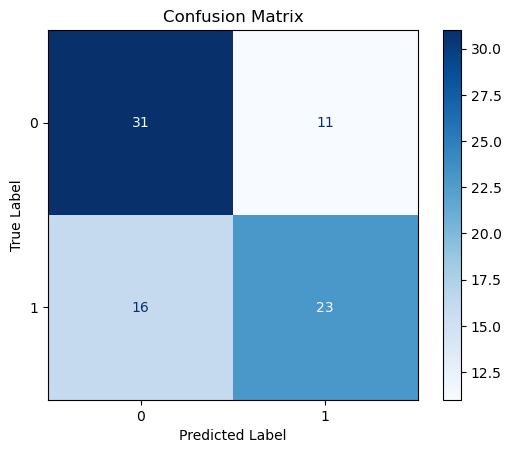

In [61]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Recall:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.6764705882352942
Recall: 0.5897435897435898
Recall: 0.6301369863013699


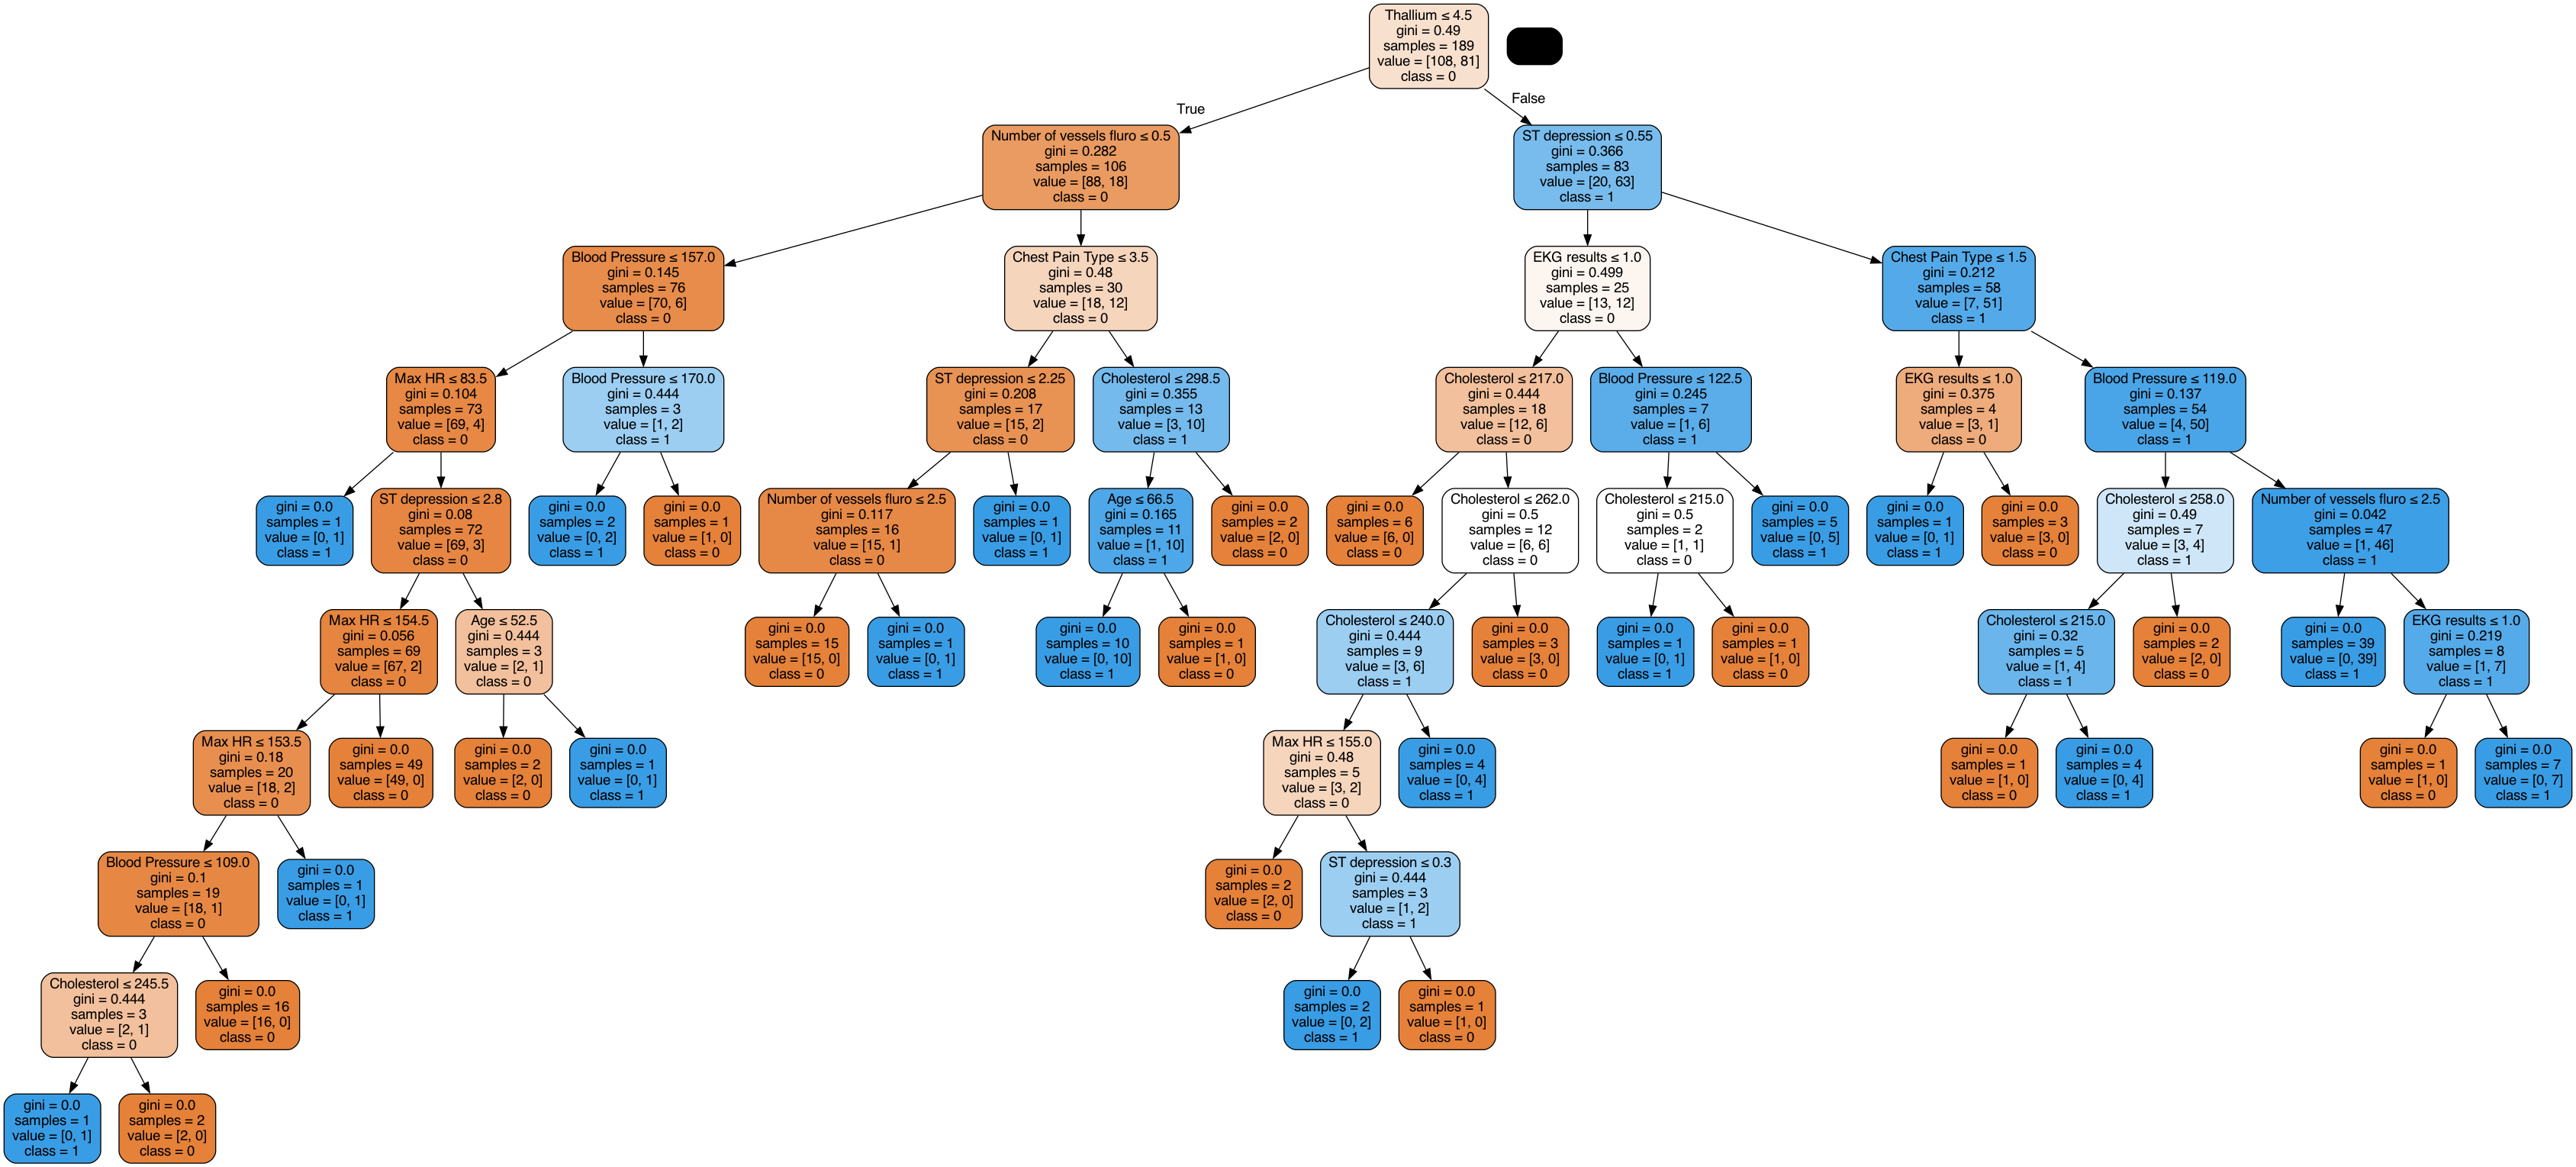

In [63]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [64]:
#the confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[31, 11],
       [16, 23]])

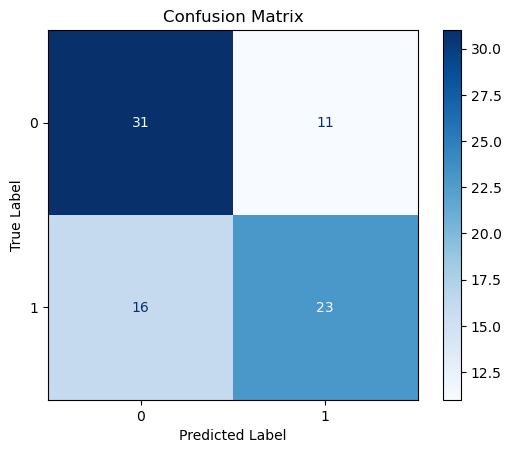

In [65]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7901234567901234
Precision: 0.7894736842105263
Recall: 0.7692307692307693
F1 score: 0.7792207792207793


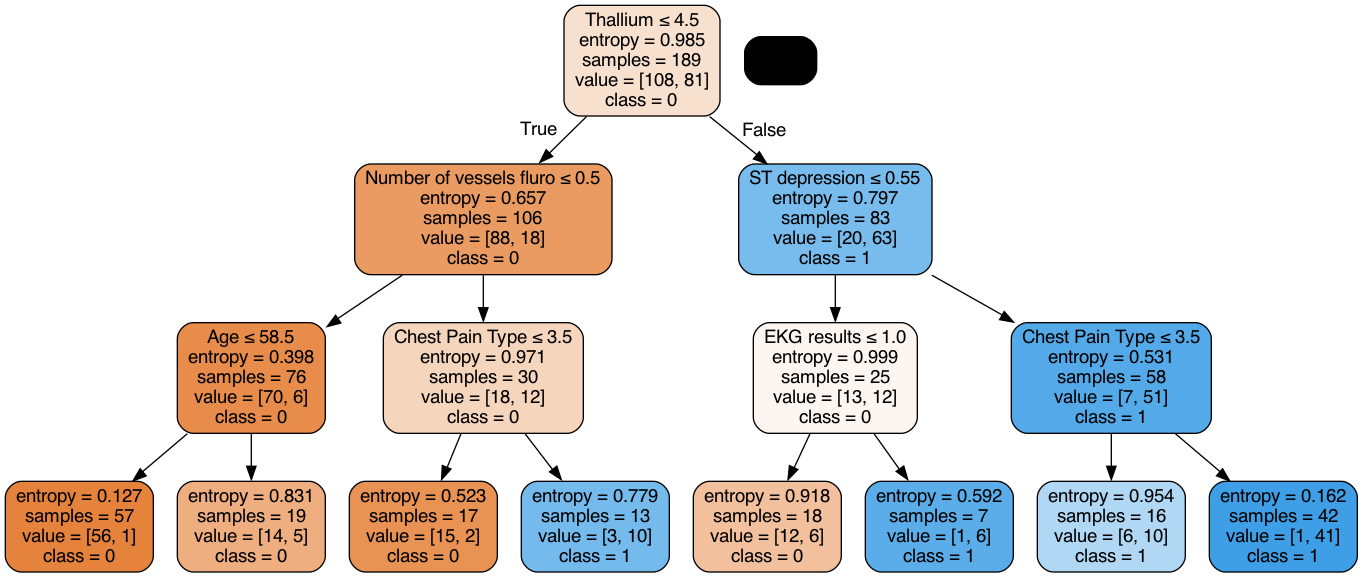

In [67]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [68]:
#fit an ANN model
#fit an ANN model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
22/22 [==============================] - 0s 5ms/step - loss: 1.3548 - accuracy: 0.6111 - val_loss: 0.9785 - val_accuracy: 0.5741
Epoch 2/80
22/22 [==============================] - 0s 1ms/step - loss: 0.9455 - accuracy: 0.6667 - val_loss: 0.8856 - val_accuracy: 0.5741
Epoch 3/80
22/22 [==============================] - 0s 1ms/step - loss: 0.8012 - accuracy: 0.6759 - val_lo

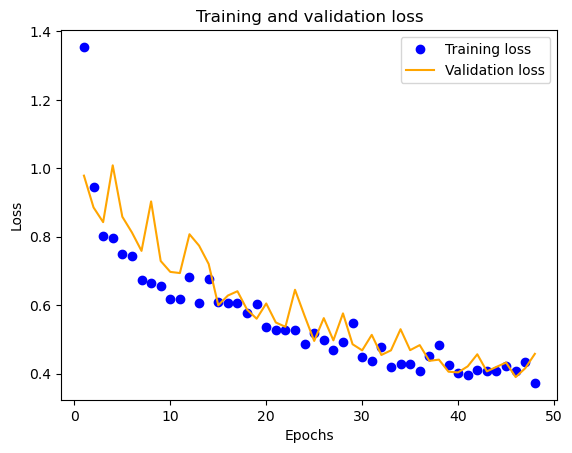

In [71]:
#Evaluate the Model

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

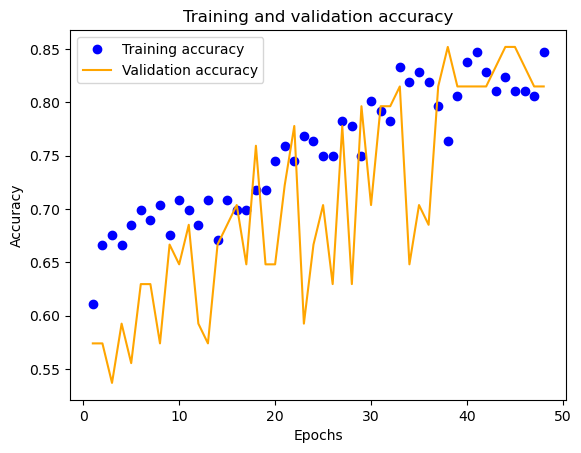

0.8518518805503845

In [72]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix

cm = confusion_matrix(Y, preds) # order matters! (actual, predicted)
cm

array([[141,   9],
       [ 36,  84]])

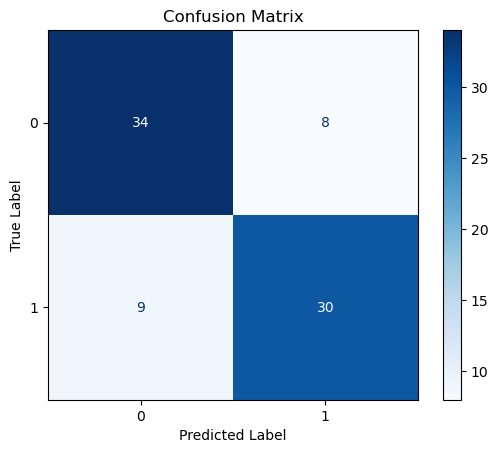

In [74]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y, preds))
print("Precision:",metrics.precision_score(Y, preds))
print("Recall:",metrics.recall_score(Y, preds))
print("F1 score:",metrics.f1_score(Y, preds))

Accuracy: 0.8333333333333334
Precision: 0.9032258064516129
Recall: 0.7
F1 score: 0.7887323943661972


In [76]:
###
###

In [ ]:
##Attempting to do the same exact as all the code above, but changing which variables are used:

In [85]:
#Selecting the independent variables and the dependent variable (H.D.):
#Below, we have selected the most 'numeric', as opposed to categorical variables:
# Age, resting BP, Cholesterol, MAX HR, Visible blood vessels
xcol_names =['Age', 'Blood Pressure', 'Cholesterol', 'Max HR', 'Number of vessels fluro']
X = df.iloc[:, [1,4,5,8,12]]
Y = df.iloc[:,[14]]


In [86]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [87]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [88]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[30, 12],
       [19, 20]])

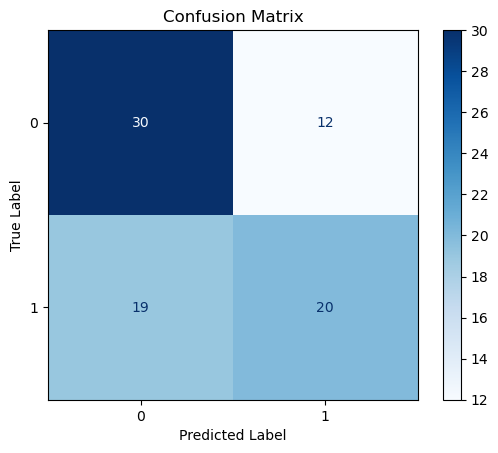

In [89]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [90]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Recall:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6172839506172839
Precision: 0.625
Recall: 0.5128205128205128
Recall: 0.5633802816901409


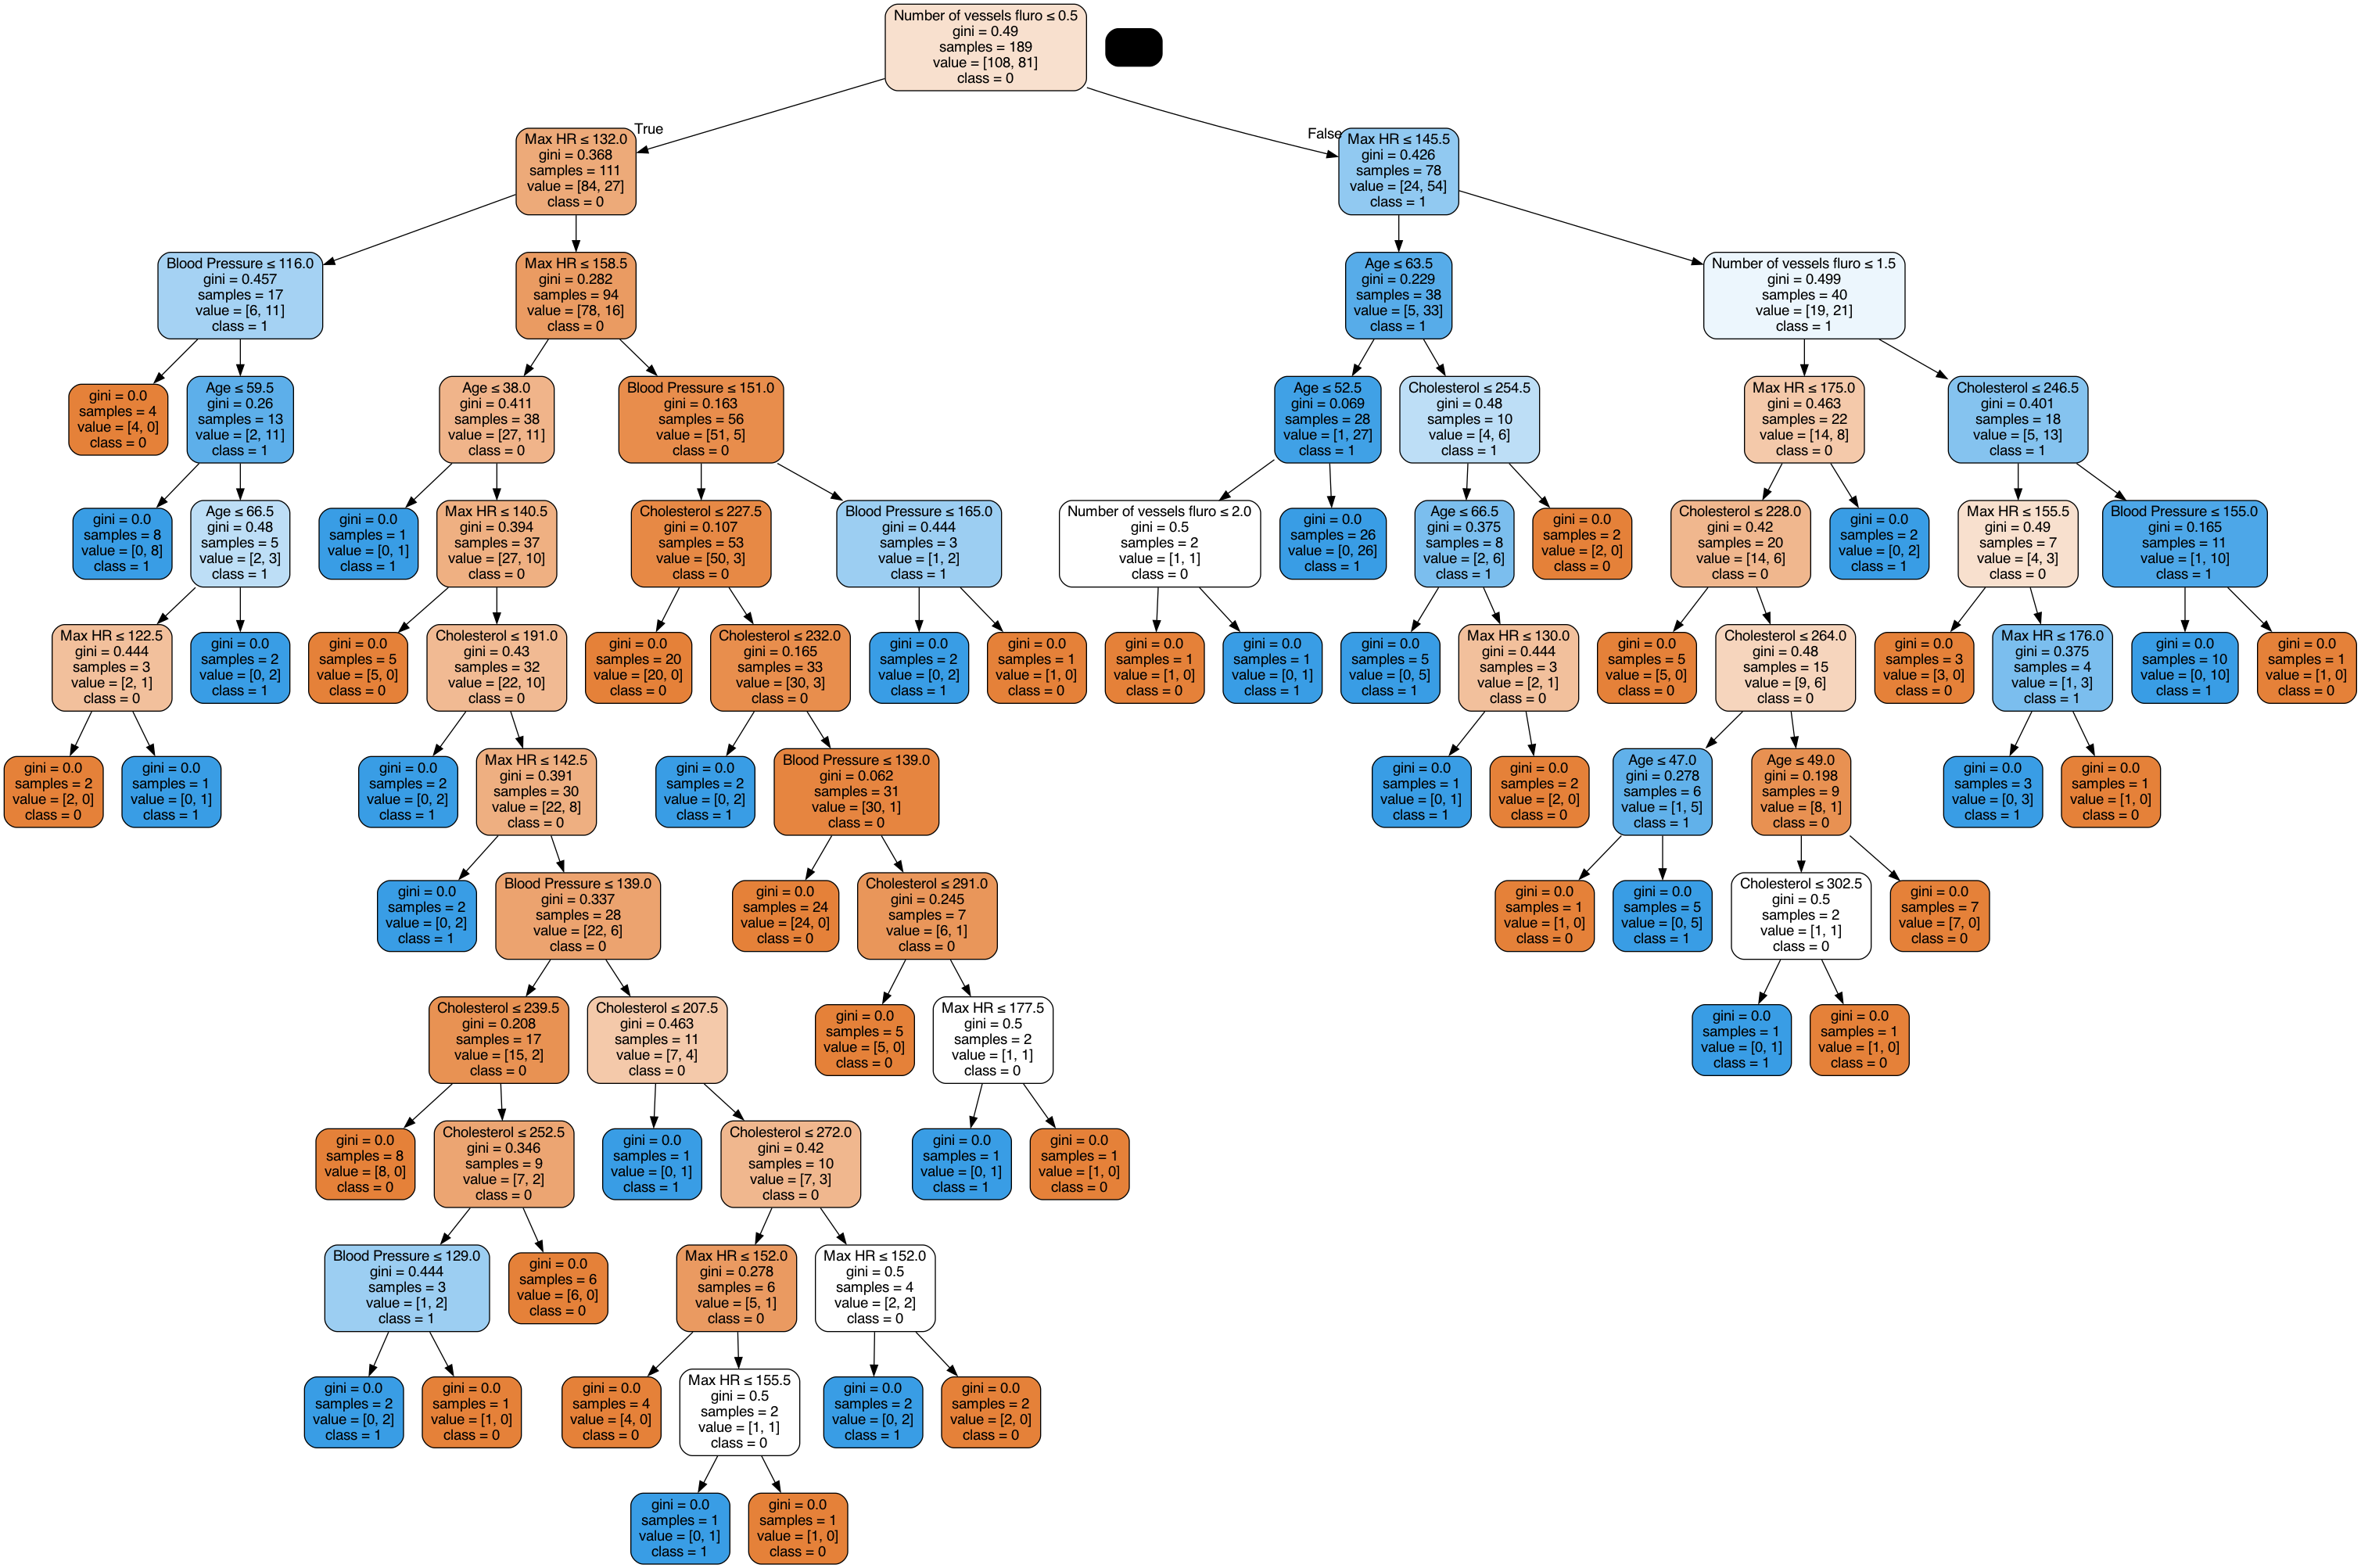

In [91]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


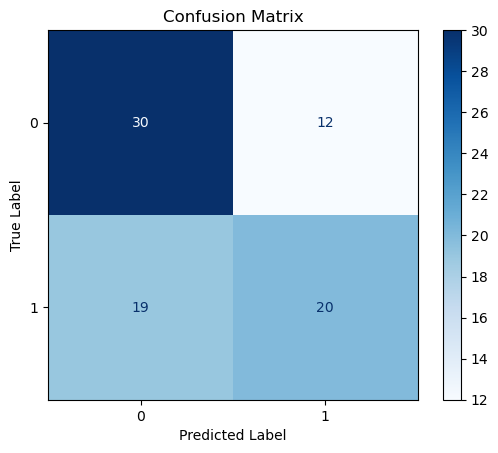

In [92]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [93]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7160493827160493
Precision: 0.7666666666666667
Recall: 0.5897435897435898
F1 score: 0.6666666666666667


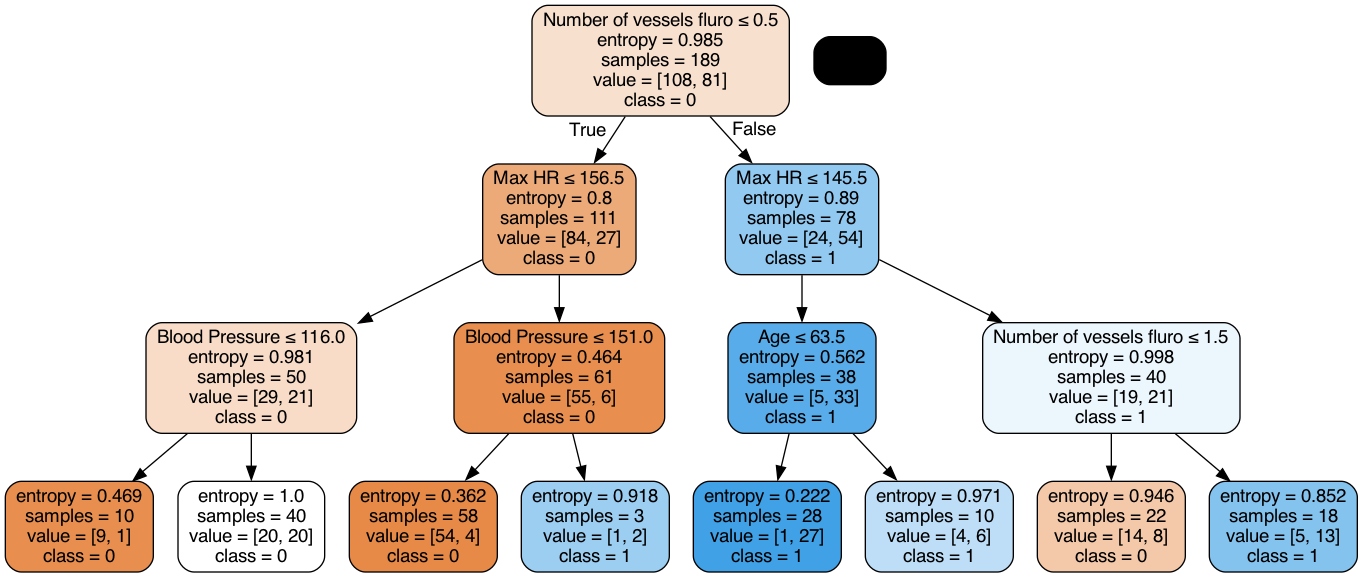

In [94]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [95]:
#fit an ANN model
#fit an ANN model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
22/22 [==============================] - 0s 6ms/step - loss: 13.0160 - accuracy: 0.5741 - val_loss: 1.1901 - val_accuracy: 0.7037
Epoch 2/80
22/22 [==============================] - 0s 2ms/step - loss: 2.4247 - accuracy: 0.6667 - val_loss: 1.2077 - val_accuracy: 0.6852
Epoch 3/80
22/22 [==============================] - 0s 2ms/step - loss: 1.6156 - accuracy: 0.6528 - val_l

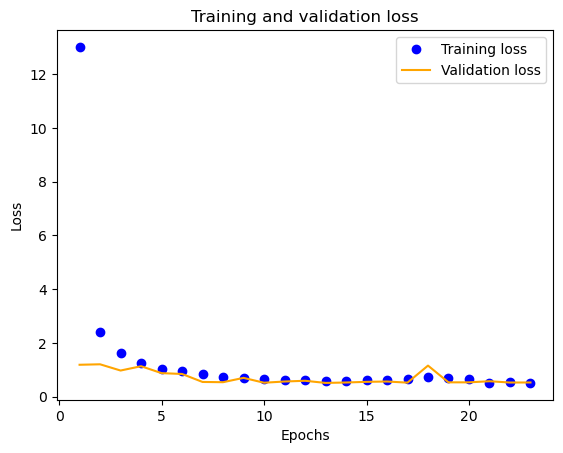

In [96]:
#Evaluate the Model

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

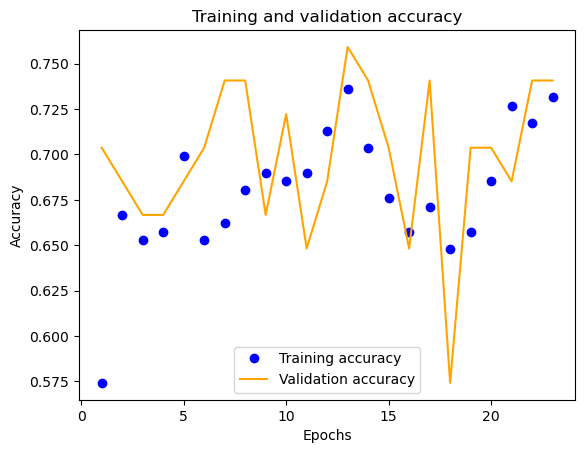

0.7592592835426331

In [97]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix

cm = confusion_matrix(Y, preds) # order matters! (actual, predicted)
cm

array([[121,  29],
       [ 45,  75]])

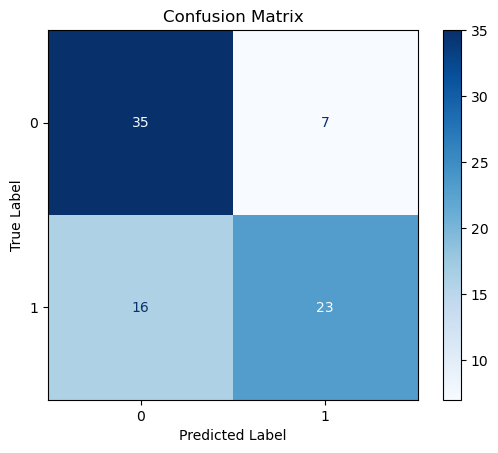

In [99]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [100]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y, preds))
print("Precision:",metrics.precision_score(Y, preds))
print("Recall:",metrics.recall_score(Y, preds))
print("F1 score:",metrics.f1_score(Y, preds))

Accuracy: 0.725925925925926
Precision: 0.7211538461538461
Recall: 0.625
F1 score: 0.6696428571428571


In [1]:
##It appears that only using the continuous parameters, the accuracy/precision is lower!

In [41]:
## Lets attempt logistic regression on the model:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
#Reading the data

df = pd.read_csv("/Users/david/Desktop/Heart_Disease_Prediction.csv")


#setting variable names:
col_names = ['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro','Thallium','Heart Disease']
xcol_names =['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro','Thallium']

In [43]:
#Performing the logistic Regression for our data set:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# read data
df = pd.read_csv("/Users/david/Desktop/Heart_Disease_Prediction.csv")

# set variable names
col_names = ['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
xcol_names = ['Age', 'Sex', 'Chest Pain Type', 'Blood Pressure', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
             'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# create a dictionary to map the "yes" and "no" values to 1's and 0's respectively
mapping = {'Presence': 1, 'Absence': 0}

# use the map() function to apply the mapping to the desired column
df['Heart Disease'] = df['Heart Disease'].map(mapping)

#Selecting the independent variables and the dependent variable (H.D.):
x = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
Y = df.iloc[:,[14]]

# split data into training and testing sets
X = x
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate logistic regression model and fit to training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on test data
y_pred = lr.predict(X_test)

# evaluate performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9074074074074074
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1-score: 0.8717948717948718


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

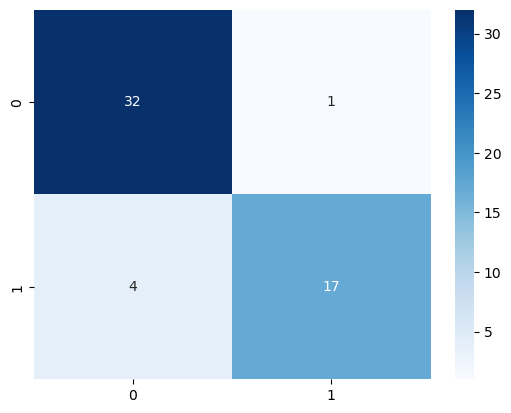

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


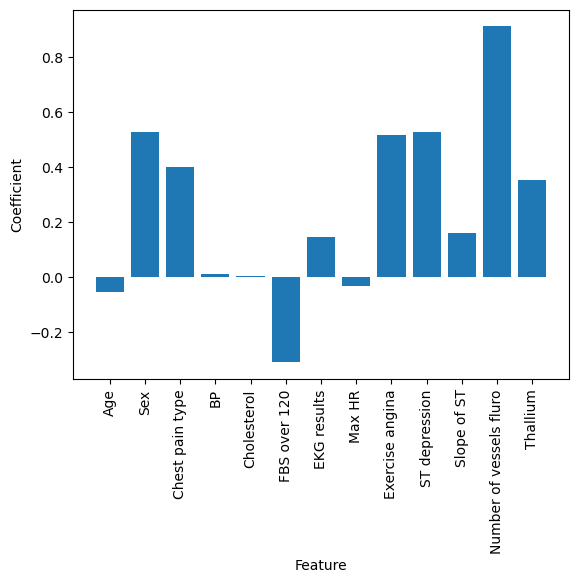

In [45]:
#Feature Importance plot along the logistic regression model:
import matplotlib.pyplot as plt

# fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# extract feature coefficients
coefficients = model.coef_[0]

# plot feature coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X_train.columns.values, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


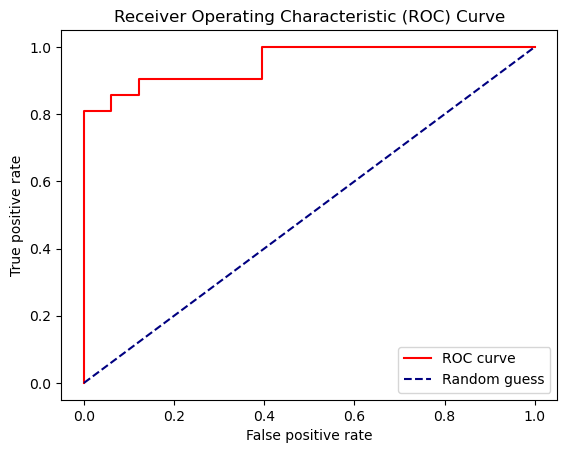

In [46]:
#Validating results of log-regression using an ROC Curve:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

# plot ROC curve
plt.plot(fpr, tpr, color='red', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

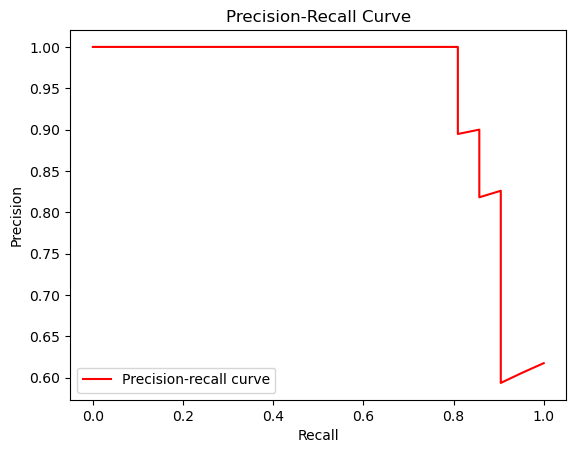

In [47]:
#Validating results of log-regression using an Precision-Recall Curve:
from sklearn.metrics import precision_recall_curve

# generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

# plot precision-recall curve
plt.plot(recall, precision, color='red', label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [48]:
#Calculating Area under the curve (AUC) of ROC curve and Precision-Recall Curve:

from sklearn.metrics import roc_auc_score, average_precision_score
# obtain predicted probabilities for test data
y_prob = lr.predict_proba(X_test)[:,1]

# compute AUC for ROC curve
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC AUC:', roc_auc)

# compute AUC for precision-recall curve
pr_auc = average_precision_score(y_test, y_prob)
print('Precision-Recall AUC:', pr_auc)


ROC AUC: 0.9538239538239539
Precision-Recall AUC: 0.9499902200669466


In [ ]:
###########

In [19]:
#Idea: Training the ANN with only the most influential variables: More or less accurate?
#I am going to use: Sex, Chest pain type, FBS, Exercise Angina, ST depression, visible vessels, and Thalium, and exlcude the rest:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


xcol_names =['Sex', 'Chest Pain Type', 'FBS over 120',
             'Exercise angina','ST depression', 'Number of vessels fluro','Thallium']
X = df.iloc[:, [2,3,6,9,10,12,13]]
Y = df.iloc[:,[14]]

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[36,  6],
       [11, 28]])

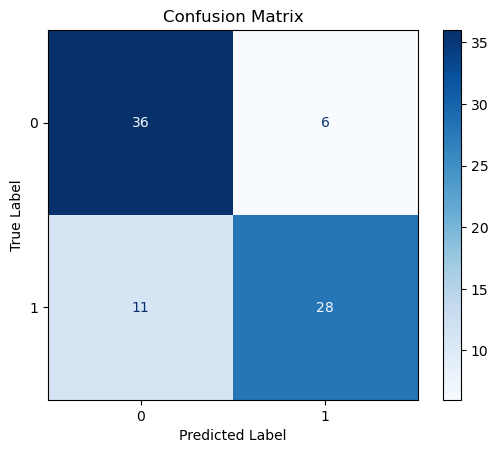

In [23]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Recall:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7901234567901234
Precision: 0.8235294117647058
Recall: 0.717948717948718
Recall: 0.767123287671233


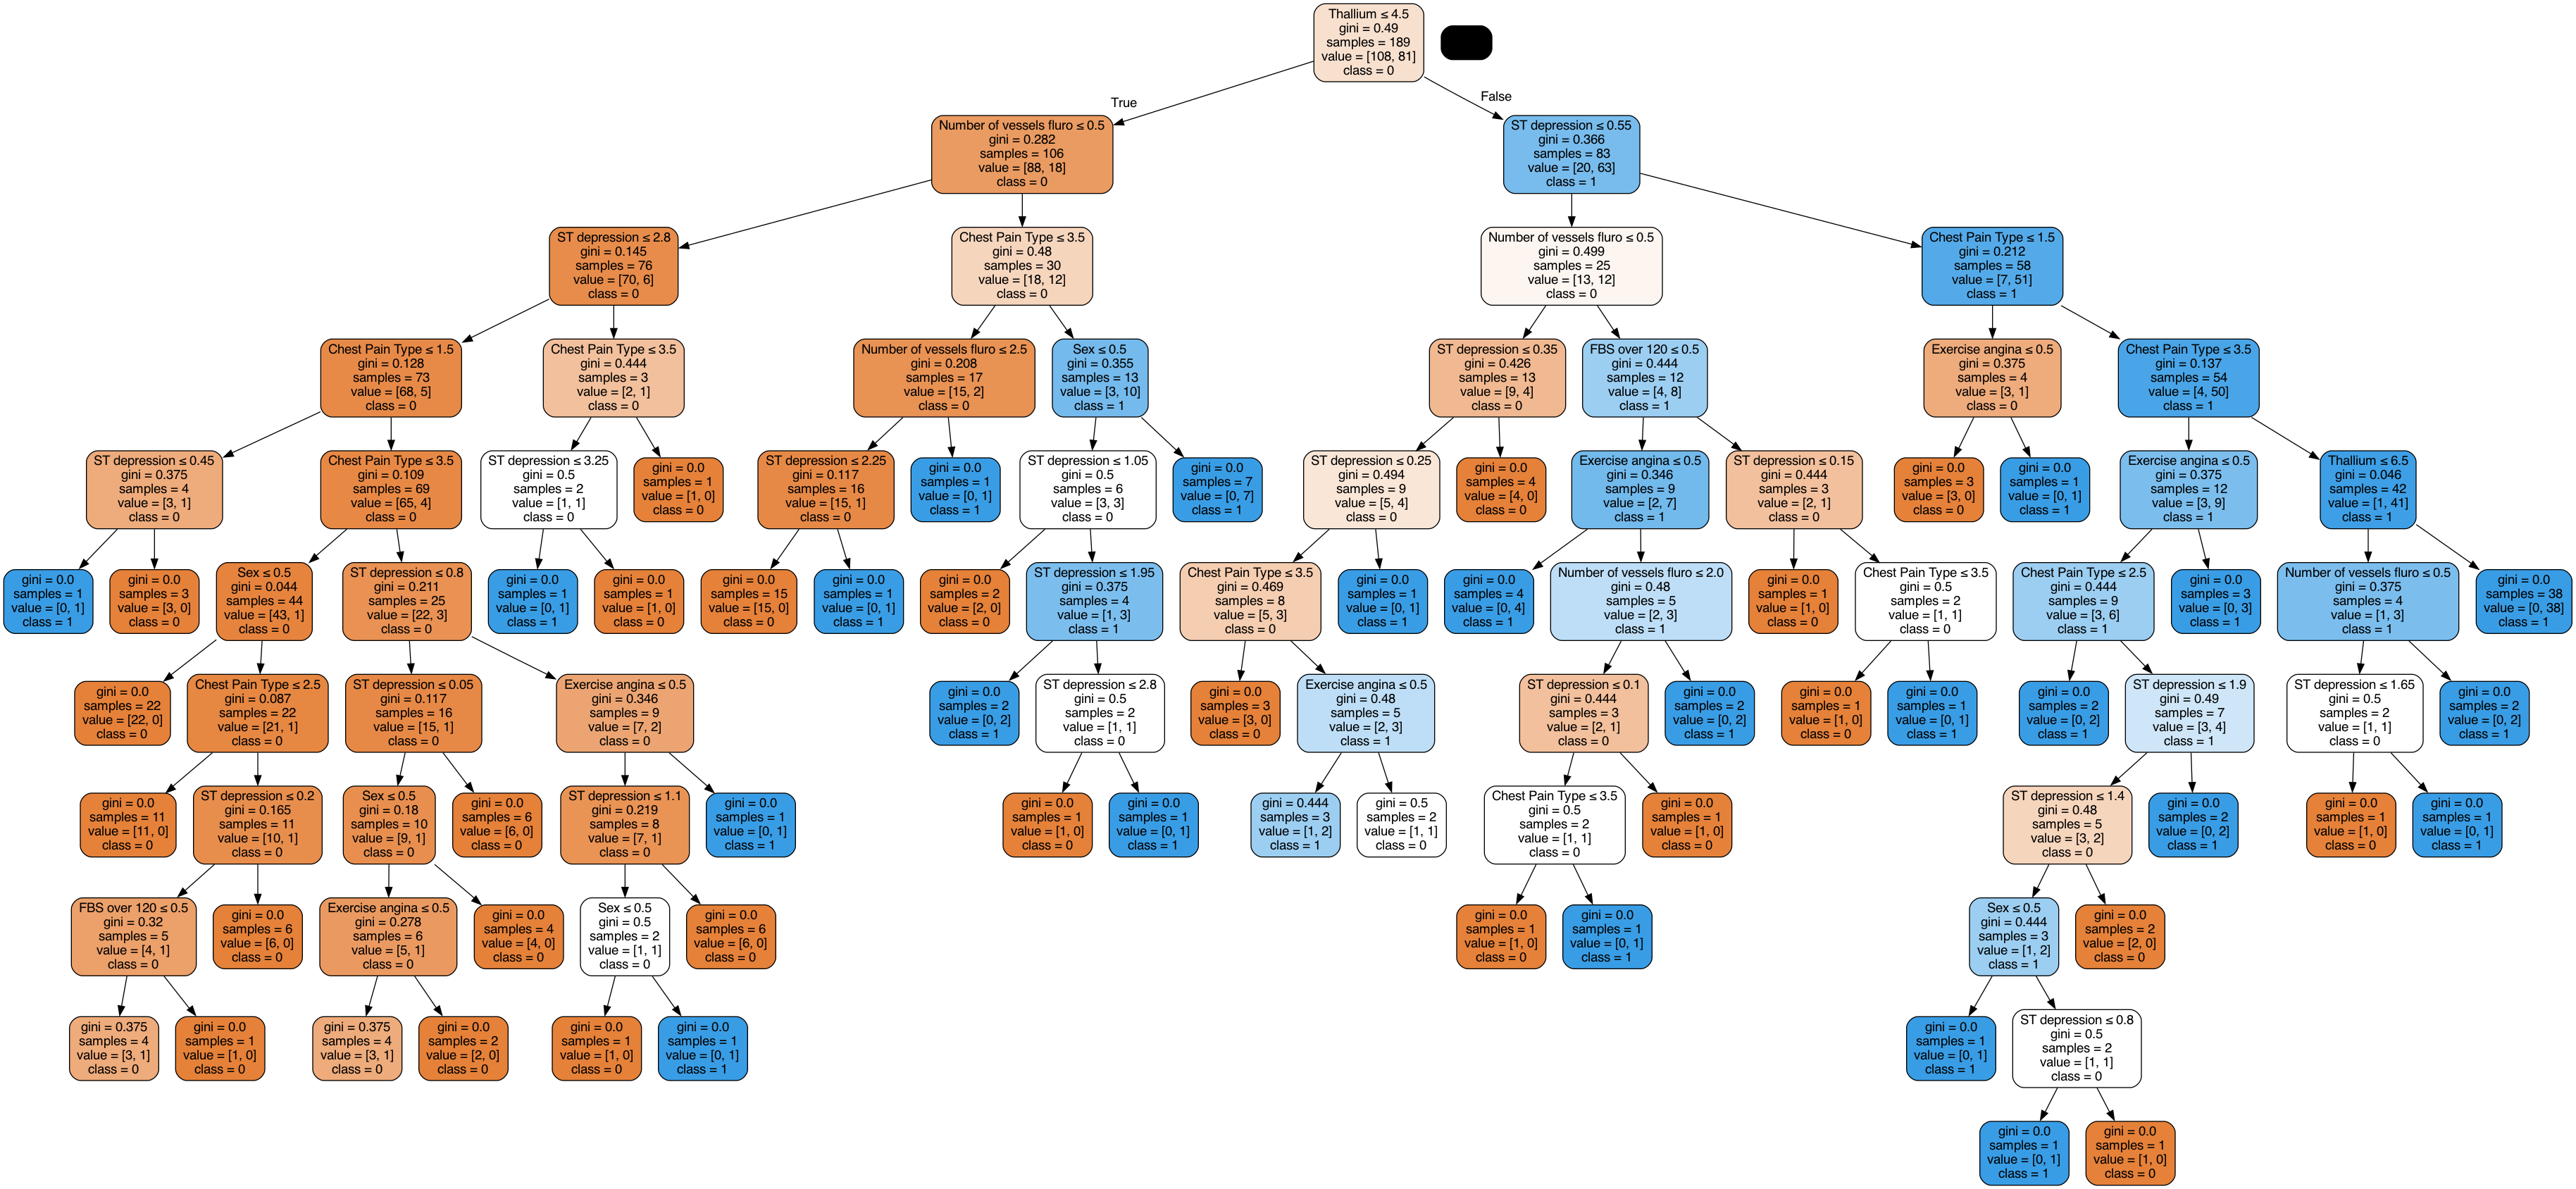

In [25]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


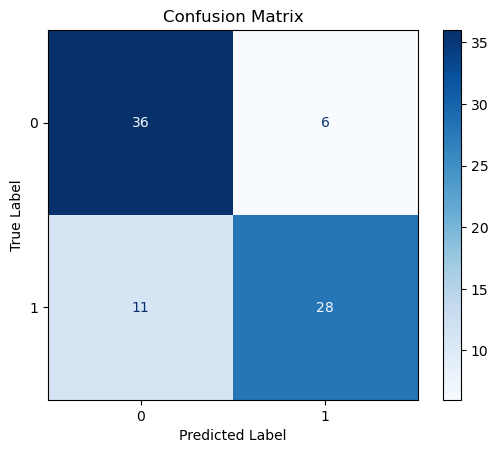

In [26]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8024691358024691
Precision: 0.8285714285714286
Recall: 0.7435897435897436
F1 score: 0.7837837837837838


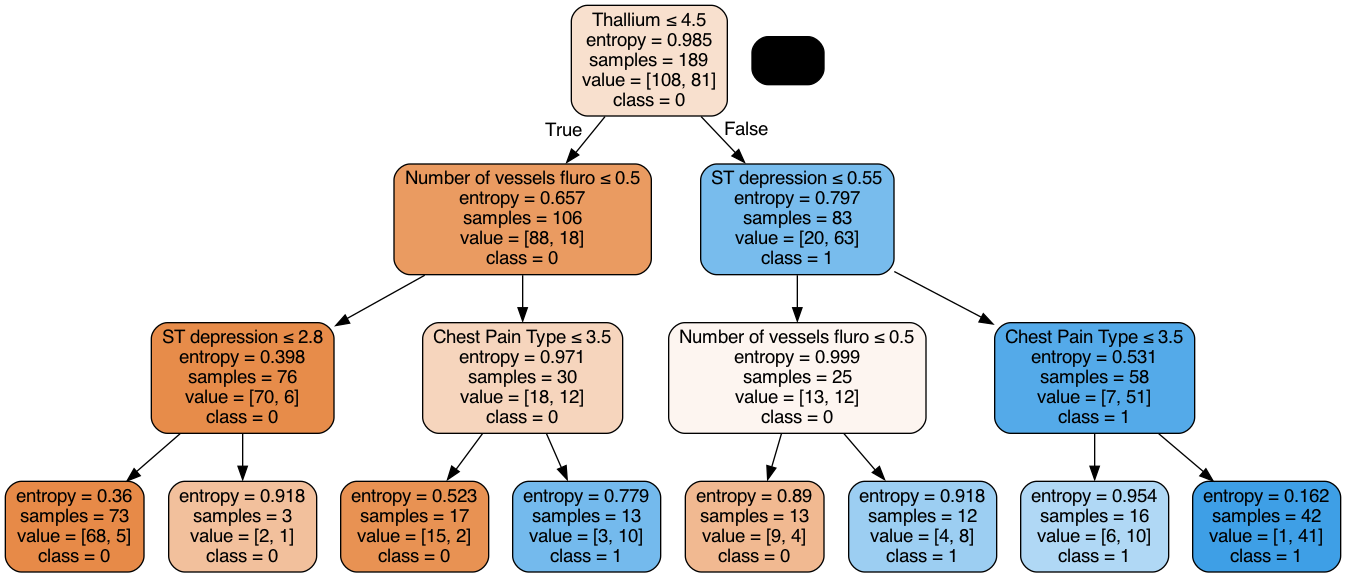

In [28]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = xcol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [29]:
#fit an ANN model
#fit an ANN model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

2023-04-15 03:16:50.114396: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 03:16:50.199483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
22/22 [==============================] - 1s 10ms/step - loss: 0.6946 - accuracy: 0.5370 - val_loss: 0.6629 - val_accuracy: 0.5741
Epoch 2/80
22/22 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6481 - val_loss: 0.6391 - val_accuracy: 0.7037
Epoch 3/80
22/22 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6528 - val_los

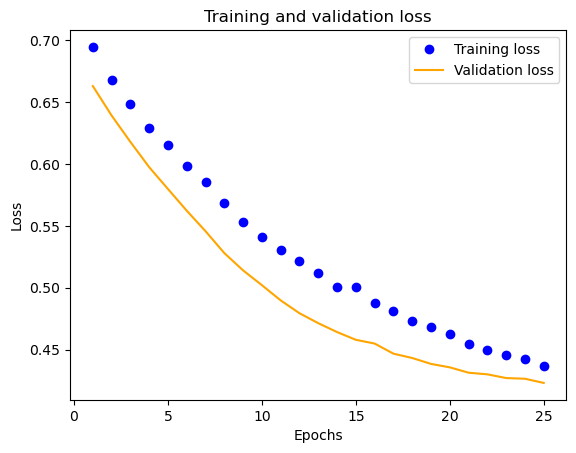

In [30]:
#Evaluate the Model

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

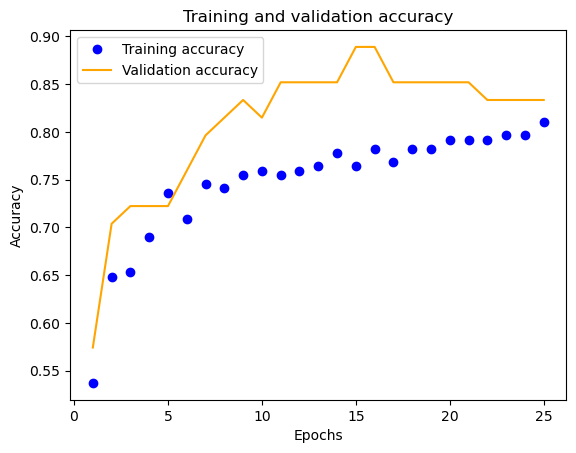

0.8888888955116272

In [31]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix

cm = confusion_matrix(Y, preds) # order matters! (actual, predicted)
cm

array([[118,  32],
       [ 21,  99]])

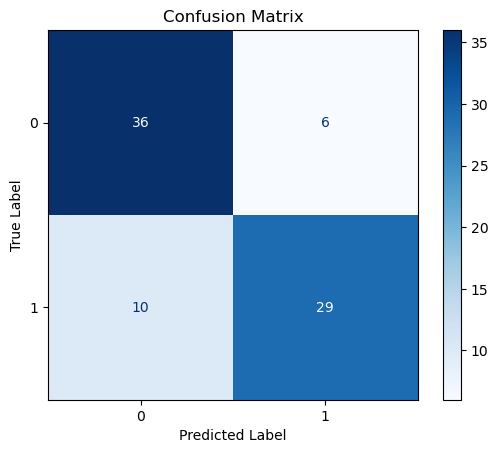

In [33]:
#Creating the Confusion Matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = 'black'
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y, preds))
print("Precision:",metrics.precision_score(Y, preds))
print("Recall:",metrics.recall_score(Y, preds))
print("F1 score:",metrics.f1_score(Y, preds))

Accuracy: 0.8037037037037037
Precision: 0.7557251908396947
Recall: 0.825
F1 score: 0.7888446215139443


In [35]:
#This model was significantlly more accurate and precise than the model that factored in only the numerical variables and NOT the categorical ones.
#But, this model was significantly less accurate and precise than the model that factored in ALL variables.

#Might we be able to say that this indicates that the ANN is picking up on
#non-linear relationships between some of the variables and the predicted outcome, that logistic regression might be less capable of computing? 